In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

In [3]:
X = df[['bathrooms', 'waterfront', 'grade', 'city_encoded', 'lat', 'bedrooms', 'view', 'long', 'condition', 'floors', 'sqm_living', 'sqm_living15']]
y = df['price'].values.reshape(-1,1)

# Déclaration initiale de df_results
df_results = pd.DataFrame(columns=['Modèle', 'Score'])

Regression linéaire

In [5]:
LinearRegression_model = LinearRegression()

LinearRegression_model.fit(X,y)

model_score = LinearRegression_model.score(X, y)
model_name = "LinearRegression"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

C:\Users\Consultant\AppData\Local\Temp\ipykernel_2580\1182398015.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, model_row], ignore_index=True)


ElasticNet

In [6]:
eNet_model = ElasticNet()

eNet_model.fit(X,y)

model_score = eNet_model.score(X, y)
model_name = "ElasticNet"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Regression polynomiale

In [7]:
poly_model = PolynomialFeatures()
x_poly = poly_model.fit_transform(X)

linear_model_for_poly = LinearRegression()
linear_model_for_poly.fit(x_poly, y)

model_score = linear_model_for_poly.score(x_poly, y)
model_name = "PolynomialFeatures"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Random forest

In [8]:
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X, y)

model_score = RandomForest_model.score(X, y)
model_name = "RandomForestRegressor"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


SVR

In [9]:
model_SVR = SVR()
model_SVR.fit(X, y)

model_score = model_SVR.score(X, y)
model_name = "SVR"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN

In [10]:
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)

model_score = knn_model.score(X, y)
model_name = "KNeighborsRegressor"
model_row = pd.DataFrame({'Modèle': model_name, 'Score': model_score}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

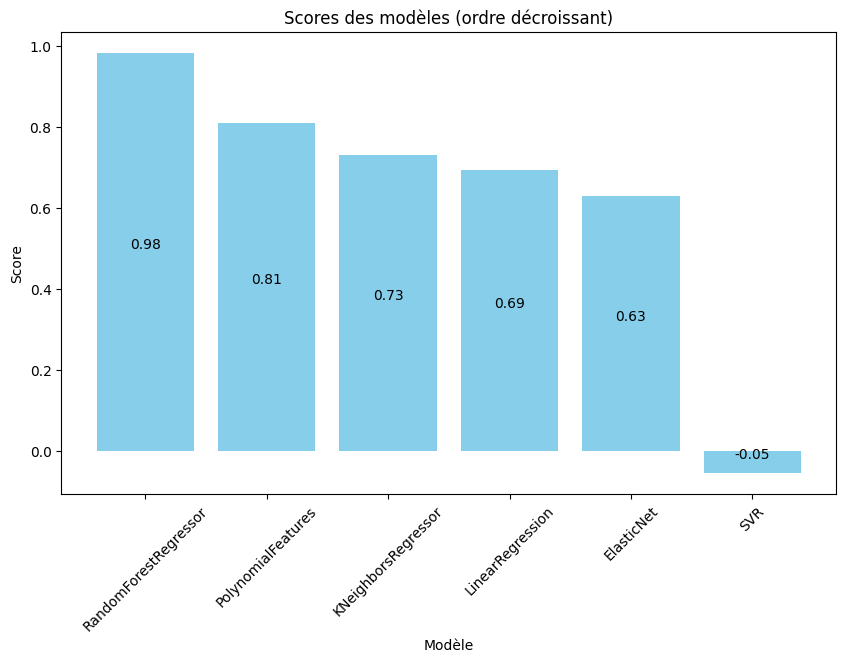

In [13]:
# Trier le DataFrame selon la colonne "Score" dans l'ordre décroissant
df_results_sorted = df_results.sort_values(by='Score', ascending=False)

# Tracer les scores dans l'ordre décroissant
plt.figure(figsize=(10, 6))
bars = plt.bar(df_results_sorted['Modèle'], df_results_sorted['Score'], color='skyblue')
plt.xlabel('Modèle')
plt.ylabel('Score')
plt.title('Scores des modèles (ordre décroissant)')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Ajouter les scores au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, round(yval, 2), ha='center', va='bottom')

plt.show()
